In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
import pandas as pd

In [14]:
customer = pd.read_csv("../input/customer_join.csv")
uselog_months = pd.read_csv("../input/use_log_months.csv")

In [15]:
year_months = list(uselog_months["年月"].unique())
uselog = pd.DataFrame()

for i in range(1, len(year_months)):
    tmp = uselog_months.loc[uselog_months["年月"]==year_months[i]]
    tmp.rename(columns={"count":"count_0"}, inplace=True)
    
    tmp_before = uselog_months.loc[uselog_months["年月"]==year_months[i-1]]
    del tmp_before["年月"]
    tmp_before.rename(columns={"count":"count_1"}, inplace=True)
    
    tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")
    uselog = pd.concat([uselog, tmp], ignore_index=True)

uselog.head()    

,年月,customer_id,count_0,count_1
0,201805,AS002855,5,4.0
1,201805,AS009373,4,3.0
2,201805,AS015233,7,NaN
3,201805,AS015315,3,6.0
4,201805,AS015739,5,7.0


In [17]:
from dateutil.relativedelta import relativedelta

exit_customer = customer.loc[customer["is_deleted"]==1]
exit_customer["exit_date"] = None
exit_customer["end_date"] = pd.to_datetime(exit_customer["end_date"])

for i in range(len(exit_customer)):
    exit_customer["exit_date"].iloc[i] = exit_customer["end_date"].iloc[i] - relativedelta(months=1)

exit_customer["年月"] = exit_customer["exit_date"].dt.strftime("%Y%m")
uselog["年月"] = uselog["年月"].astype(str)
exit_uselog = pd.merge(uselog, exit_customer, on=["customer_id", "年月"], how="left")

print(len(uselog))
exit_uselog.head()

33851


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201805,AS002855,5,4.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201805,AS009373,4,3.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201805,AS015233,7,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201805,AS015315,3,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201805,AS015739,5,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
exit_uselog = exit_uselog.dropna(subset=["name"])
print(len(exit_uselog))
print(len(exit_uselog["customer_id"].unique()))
exit_uselog.head()

1104
1104


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
19,201805,AS055680,3,3.0,XXXXX,C01,M,2018-03-01,2018-06-30,CA1,...,10500.0,通常,3.000000,3.0,3.0,3.0,0.0,2018-06-30,3.0,2018-05-30 00:00:00
57,201805,AS169823,2,3.0,XX,C01,M,2017-11-01,2018-06-30,CA1,...,10500.0,通常,3.000000,3.0,4.0,2.0,1.0,2018-06-30,7.0,2018-05-30 00:00:00
110,201805,AS305860,5,3.0,XXXX,C01,M,2017-06-01,2018-06-30,CA1,...,10500.0,通常,3.333333,3.0,5.0,2.0,0.0,2018-06-30,12.0,2018-05-30 00:00:00
128,201805,AS363699,5,3.0,XXXXX,C01,M,2018-02-01,2018-06-30,CA1,...,10500.0,通常,3.333333,3.0,5.0,2.0,0.0,2018-06-30,4.0,2018-05-30 00:00:00
147,201805,AS417696,1,4.0,XX,C03,F,2017-09-01,2018-06-30,CA1,...,6000.0,通常,2.000000,1.0,4.0,1.0,0.0,2018-06-30,9.0,2018-05-30 00:00:00


In [19]:
conti_customer = customer.loc[customer["is_deleted"]==0]
conti_uselog = pd.merge(uselog, conti_customer, on=["customer_id"], how="left")
print(len(conti_uselog))
conti_uselog = conti_uselog.dropna(subset=["name"])
print(len(conti_uselog))

33851
27422


In [21]:
conti_uselog = conti_uselog.sample(frac=1).reset_index(drop=True)
conti_uselog = conti_uselog.drop_duplicates(subset=["customer_id"])
print(len(conti_uselog))
conti_uselog.head()

2842


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201902,HD165212,4,5.0,XXXX,C03,M,2017-01-01,NaN,CA1,...,ナイト,6000.0,通常,5.250000,5.5,9.0,2.0,1.0,2019-04-30,27.0
1,201812,HD559223,8,7.0,XXXXXX,C01,F,2017-03-01,NaN,CA1,...,オールタイム,10500.0,通常,5.333333,5.0,8.0,3.0,1.0,2019-04-30,25.0
2,201808,IK913187,6,5.0,XXXX,C01,F,2017-02-01,NaN,CA1,...,オールタイム,10500.0,通常,5.000000,5.5,7.0,1.0,1.0,2019-04-30,26.0
3,201811,HI093998,11,NaN,XXXX,C03,M,2018-11-04,NaN,CA1,...,ナイト,6000.0,通常,9.000000,9.0,11.0,6.0,1.0,2019-04-30,5.0
4,201903,GD289362,7,6.0,XX,C02,F,2018-05-04,NaN,CA2,...,デイタイム,7500.0,入会費半額,8.090909,8.0,10.0,6.0,1.0,2019-04-30,11.0


In [22]:
predict_data = pd.concat([conti_uselog, exit_uselog], ignore_index=True)
print(len(predict_data))
predict_data.head()

3946


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201902,HD165212,4,5.0,XXXX,C03,M,2017-01-01,NaN,CA1,...,6000.0,通常,5.250000,5.5,9.0,2.0,1.0,2019-04-30,27.0,NaN
1,201812,HD559223,8,7.0,XXXXXX,C01,F,2017-03-01,NaN,CA1,...,10500.0,通常,5.333333,5.0,8.0,3.0,1.0,2019-04-30,25.0,NaN
2,201808,IK913187,6,5.0,XXXX,C01,F,2017-02-01,NaN,CA1,...,10500.0,通常,5.000000,5.5,7.0,1.0,1.0,2019-04-30,26.0,NaN
3,201811,HI093998,11,NaN,XXXX,C03,M,2018-11-04,NaN,CA1,...,6000.0,通常,9.000000,9.0,11.0,6.0,1.0,2019-04-30,5.0,NaN
4,201903,GD289362,7,6.0,XX,C02,F,2018-05-04,NaN,CA2,...,7500.0,入会費半額,8.090909,8.0,10.0,6.0,1.0,2019-04-30,11.0,NaN


In [27]:
predict_data["period"] = 0
predict_data["now_date"] = pd.to_datetime(predict_data["年月"], format="%Y%m")
predict_data["start_date"] = pd.to_datetime(predict_data["start_date"])

for i in range(len(predict_data)):
    delta = relativedelta(predict_data["now_date"][i], predict_data["start_date"][i])
    predict_data["period"][i] = int(delta.years*12 + delta.months)

predict_data.head()

,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date,period,now_date
0,201902,HD165212,4,5.0,XXXX,C03,M,2017-01-01,NaN,CA1,...,5.250000,5.5,9.0,2.0,1.0,2019-04-30,27.0,NaN,25,2019-02-01
1,201812,HD559223,8,7.0,XXXXXX,C01,F,2017-03-01,NaN,CA1,...,5.333333,5.0,8.0,3.0,1.0,2019-04-30,25.0,NaN,21,2018-12-01
2,201808,IK913187,6,5.0,XXXX,C01,F,2017-02-01,NaN,CA1,...,5.000000,5.5,7.0,1.0,1.0,2019-04-30,26.0,NaN,18,2018-08-01
3,201811,HI093998,11,NaN,XXXX,C03,M,2018-11-04,NaN,CA1,...,9.000000,9.0,11.0,6.0,1.0,2019-04-30,5.0,NaN,0,2018-11-01
4,201903,GD289362,7,6.0,XX,C02,F,2018-05-04,NaN,CA2,...,8.090909,8.0,10.0,6.0,1.0,2019-04-30,11.0,NaN,9,2019-03-01


In [28]:
predict_data.isna().sum()

年月                      0
customer_id             0
count_0                 0
count_1               258
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2842
period                  0
now_date                0
dtype: int64

In [29]:
predict_data = predict_data.dropna(subset=["count_1"])
predict_data.isna().sum()

年月                      0
customer_id             0
count_0                 0
count_1                 0
name                    0
class                   0
gender                  0
start_date              0
end_date             2636
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2636
period                  0
now_date                0
dtype: int64

In [33]:
predict_data.columns

Index(['年月', 'customer_id', 'count_0', 'count_1', 'name', 'class', 'gender',
       'start_date', 'end_date', 'campaign_id', 'is_deleted', 'class_name',
       'price', 'campaign_name', 'mean', 'median', 'max', 'min', 'routine_flg',
       'calc_date', 'membership_period', 'exit_date', 'period', 'now_date'],
      dtype='object')

In [34]:
target_cols = ["campaign_name", "class_name", "gender", "count_1", "routine_flg", "period", "is_deleted"]
predict_data = predict_data[target_cols]
predict_data.head()

,campaign_name,class_name,gender,count_1,routine_flg,period,is_deleted
0,通常,ナイト,M,5.0,1.0,25,0.0
1,通常,オールタイム,F,7.0,1.0,21,0.0
2,通常,オールタイム,F,5.0,1.0,18,0.0
4,入会費半額,デイタイム,F,6.0,1.0,9,0.0
5,通常,オールタイム,M,8.0,1.0,15,0.0


In [35]:
predict_data = pd.get_dummies(predict_data)
predict_data.head()

,count_1,routine_flg,period,is_deleted,campaign_name_入会費半額,campaign_name_入会費無料,campaign_name_通常,class_name_オールタイム,class_name_デイタイム,class_name_ナイト,gender_F,gender_M
0,5.0,1.0,25,0.0,0,0,1,0,0,1,0,1
1,7.0,1.0,21,0.0,0,0,1,1,0,0,1,0
2,5.0,1.0,18,0.0,0,0,1,1,0,0,1,0
4,6.0,1.0,9,0.0,1,0,0,0,1,0,1,0
5,8.0,1.0,15,0.0,0,0,1,1,0,0,0,1


In [36]:
del predict_data["campaign_name_通常"]
del predict_data["class_name_ナイト"]
del predict_data["gender_M"]
predict_data.head()

,count_1,routine_flg,period,is_deleted,campaign_name_入会費半額,campaign_name_入会費無料,class_name_オールタイム,class_name_デイタイム,gender_F
0,5.0,1.0,25,0.0,0,0,0,0,0
1,7.0,1.0,21,0.0,0,0,1,0,1
2,5.0,1.0,18,0.0,0,0,1,0,1
4,6.0,1.0,9,0.0,1,0,0,1,1
5,8.0,1.0,15,0.0,0,0,1,0,0


<AxesSubplot:xlabel='is_deleted', ylabel='count'>

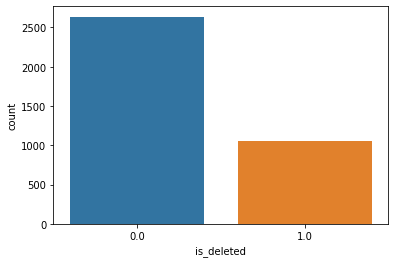

In [37]:
import seaborn as sns
sns.countplot(predict_data["is_deleted"])

In [68]:
from sklearn import model_selection

predict_data["kfold"] = -1
predict_data = predict_data.sample(frac=1).reset_index(drop=True)
y = predict_data.is_deleted.values

skf = model_selection.StratifiedKFold(n_splits=3)

for fold, (trn_idx, val_idx) in enumerate(skf.split(X=predict_data, y=y)):
    predict_data.loc[val_idx, "kfold"] = fold

predict_data.head()

,count_1,routine_flg,period,is_deleted,campaign_name_入会費半額,campaign_name_入会費無料,class_name_オールタイム,class_name_デイタイム,gender_F,kfold
0,2.0,1.0,20,1.0,0,0,0,0,0,0
1,5.0,1.0,42,0.0,0,0,1,0,0,0
2,1.0,1.0,11,1.0,0,1,0,0,0,0
3,5.0,1.0,17,0.0,0,0,1,0,1,0
4,7.0,0.0,0,1.0,0,0,0,0,0,0


<AxesSubplot:xlabel='kfold', ylabel='count'>

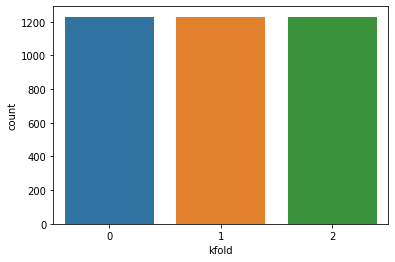

In [69]:
sns.countplot(predict_data["kfold"])

In [120]:
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

def run(fold):
    df = predict_data
    df_train = df[df.kfold != fold].reset_index(drop=True) 
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    xtrain = df_train.drop("is_deleted", axis=1)
    ytrain = df_train.is_deleted
    
    xvalid = df_valid.drop("is_deleted", axis=1)
    yvalid = df_valid.is_deleted
    
    clf = tree.DecisionTreeClassifier(
        random_state=0,
        max_depth=5,
    )
    clf.fit(xtrain, ytrain)
    preds = clf.predict(xvalid)
    acc = metrics.accuracy_score(yvalid, preds)
    #results_test = pd.DataFrame({"preds":preds, "yvalid":yvalid})
    
    importance = pd.DataFrame({"feat_names": xtrain.columns, "coeff": clf.feature_importances_})
    
    plt.figure(figsize=(20, 20))
    tree.plot_tree(clf, filled=True)
    plt.show()
    
    print(f"FOLD: {fold}, ACC={acc:.3f}")
    print("COEFF:")
    print(importance)
    

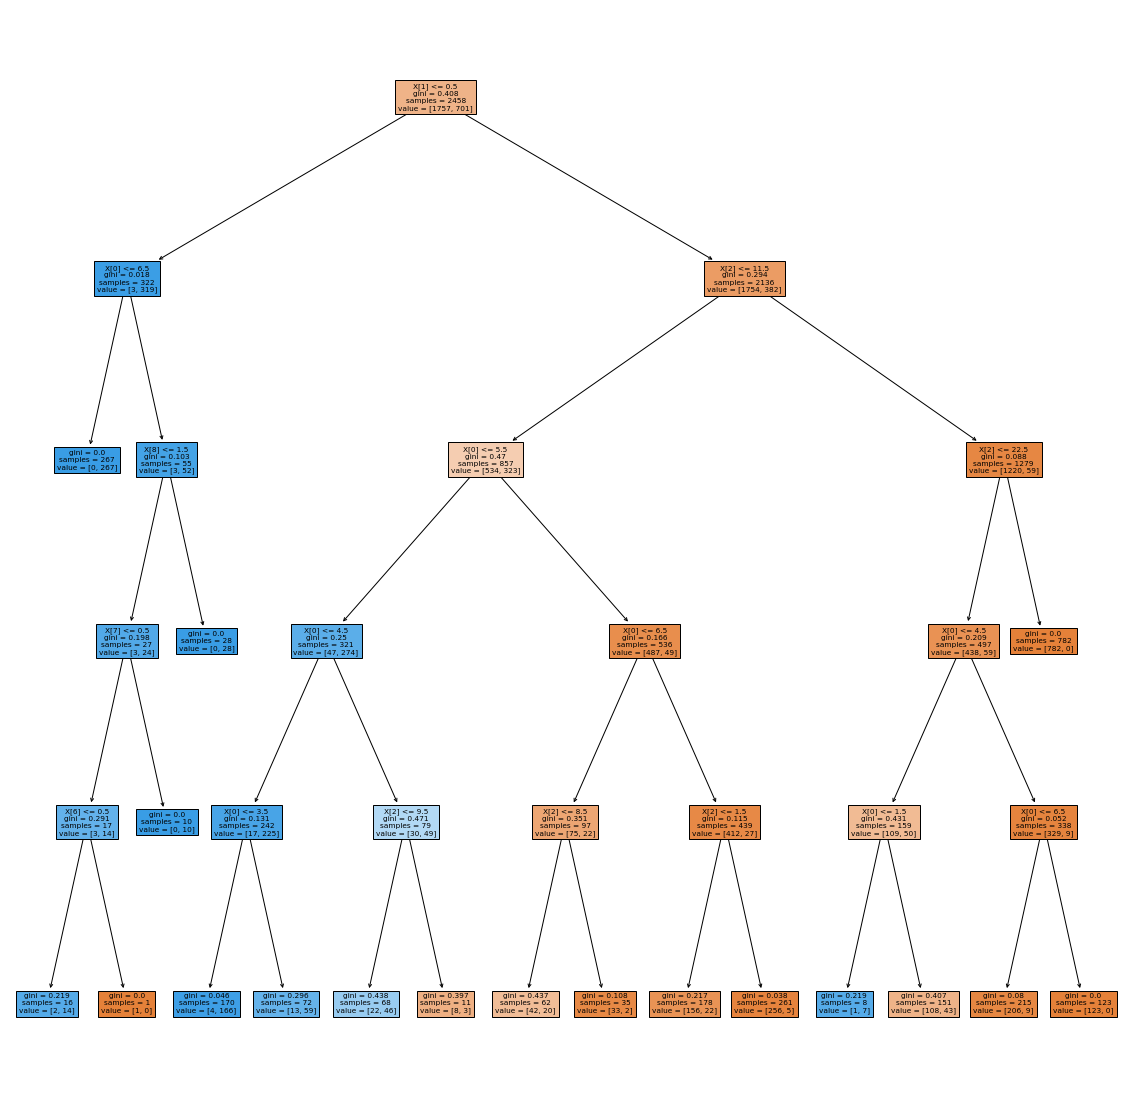

FOLD: 0, ACC=0.941
COEFF:
            feat_names     coeff
0              count_1  0.354854
1          routine_flg  0.475525
2               period  0.166820
3  campaign_name_入会費半額  0.000000
4  campaign_name_入会費無料  0.000000
5    class_name_オールタイム  0.000000
6     class_name_デイタイム  0.001858
7             gender_F  0.000506
8                kfold  0.000438


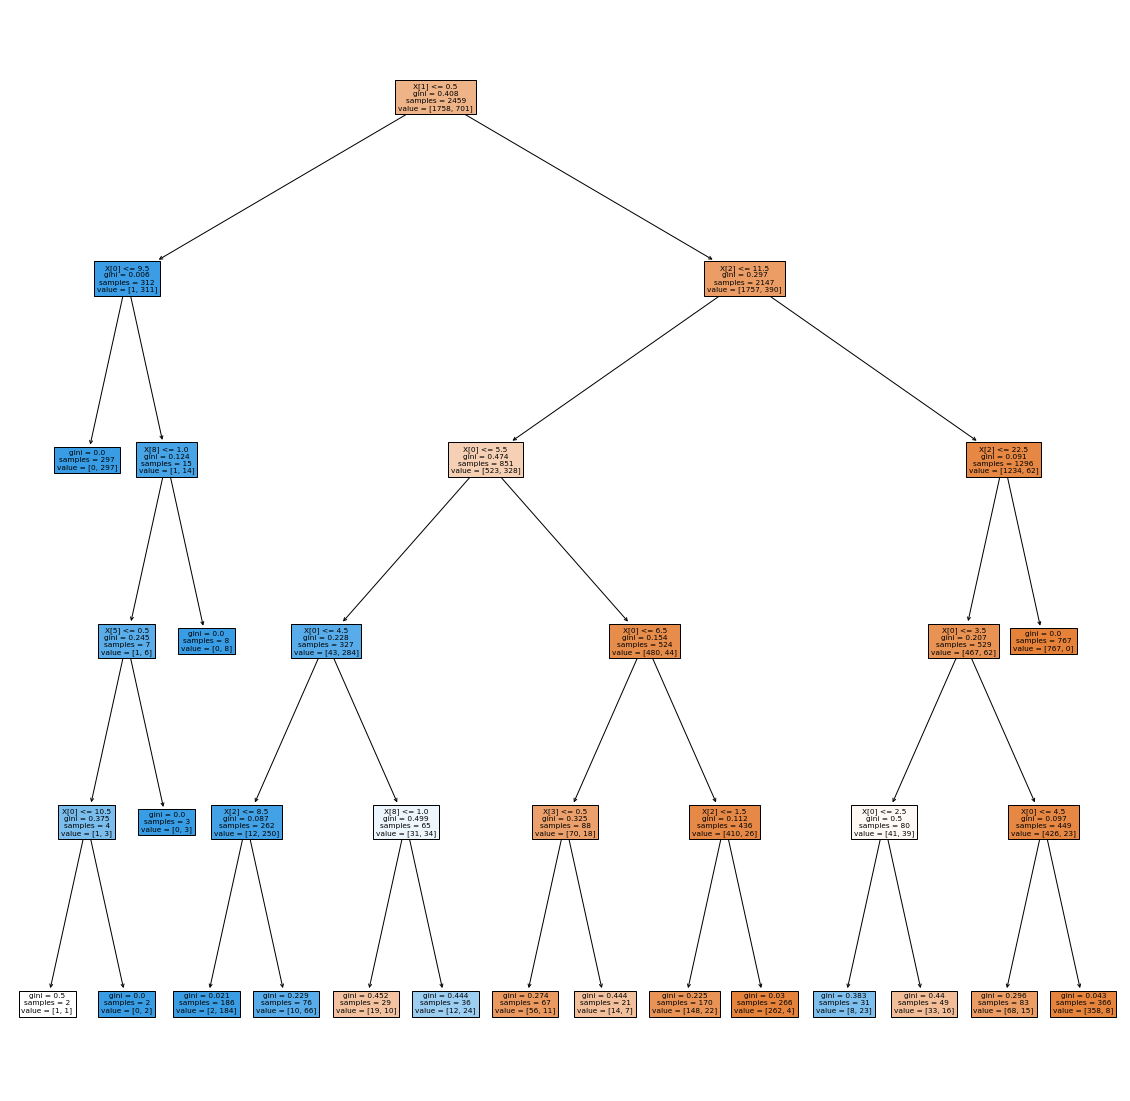

FOLD: 1, ACC=0.923
COEFF:
            feat_names     coeff
0              count_1  0.381825
1          routine_flg  0.450641
2               period  0.161796
3  campaign_name_入会費半額  0.001139
4  campaign_name_入会費無料  0.000000
5    class_name_オールタイム  0.000267
6     class_name_デイタイム  0.000000
7             gender_F  0.000000
8                kfold  0.004332


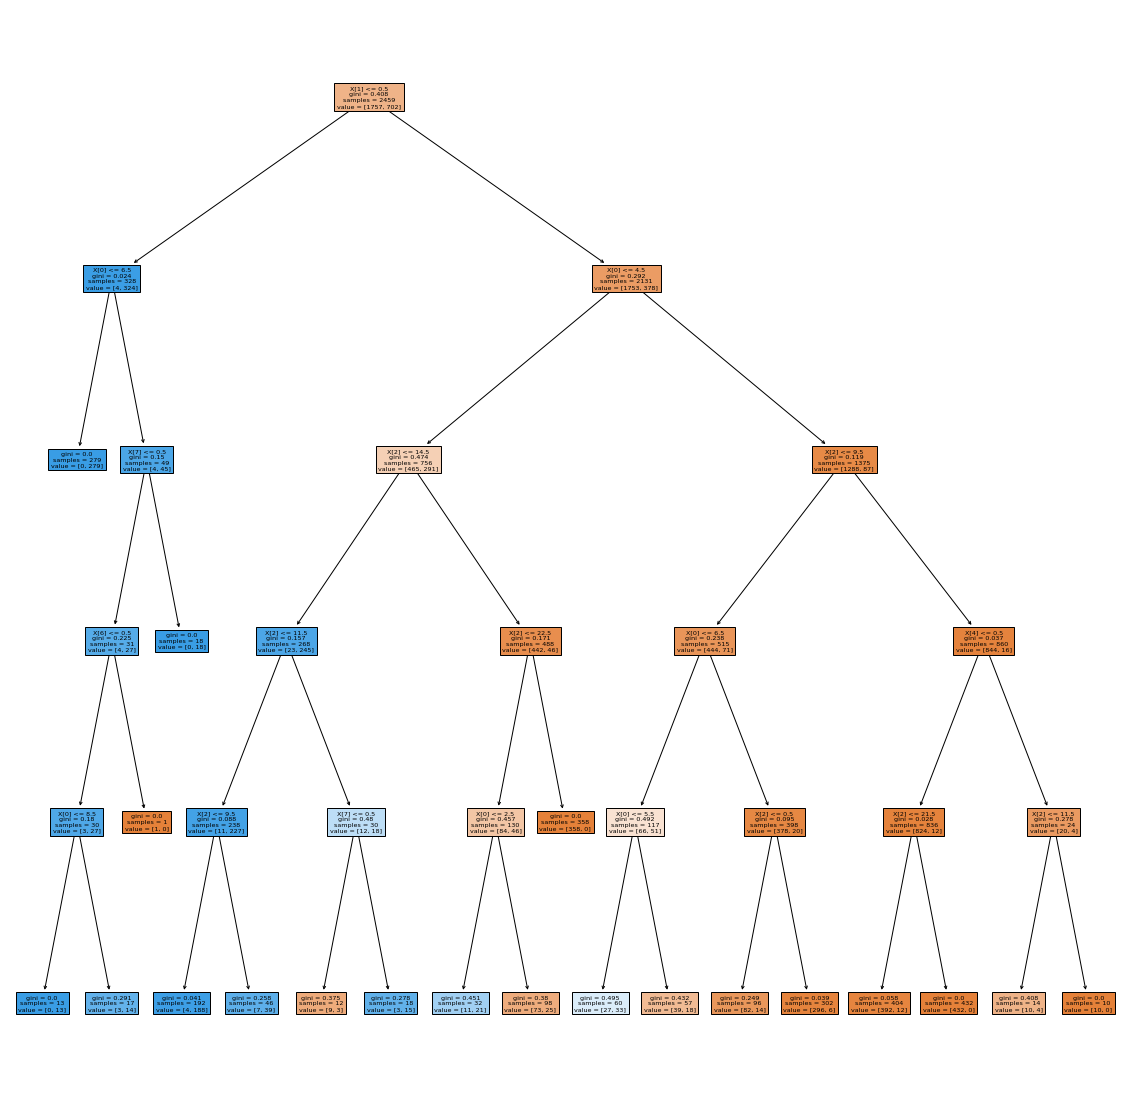

FOLD: 2, ACC=0.940
COEFF:
            feat_names     coeff
0              count_1  0.175128
1          routine_flg  0.467694
2               period  0.347246
3  campaign_name_入会費半額  0.000000
4  campaign_name_入会費無料  0.001356
5    class_name_オールタイム  0.000000
6     class_name_デイタイム  0.001964
7             gender_F  0.006613
8                kfold  0.000000


In [121]:
for j in range(3):
    run(j)